In [ ]:
import pandas_datareader as web
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
%matplotlib inline

In [ ]:
symbol = input('Type the symbol:')
symbol.upper()

df = web.DataReader(symbol, data_source='yahoo', start='2015-01-01', end='2020-09-21')
print("HISTORY DATA")
df.tail(30)

Type the symbol:aapl
HISTORY DATA


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-08-10,113.775002,110.000000,112.599998,112.727501,212403600.0,112.727501
2020-08-11,112.482498,109.107498,111.970001,109.375000,187902400.0,109.375000
2020-08-12,113.275002,110.297501,110.497498,113.010002,165944800.0,113.010002
2020-08-13,116.042503,113.927498,114.430000,115.010002,210082000.0,115.010002
2020-08-14,115.000000,113.044998,114.830002,114.907501,165565200.0,114.907501
2020-08-17,116.087502,113.962502,116.062500,114.607498,119561600.0,114.607498
2020-08-18,116.000000,114.007500,114.352501,115.562500,105633600.0,115.562500
2020-08-19,117.162498,115.610001,115.982498,115.707497,145538000.0,115.707497
2020-08-20,118.392502,115.732498,115.750000,118.275002,126907200.0,118.275002


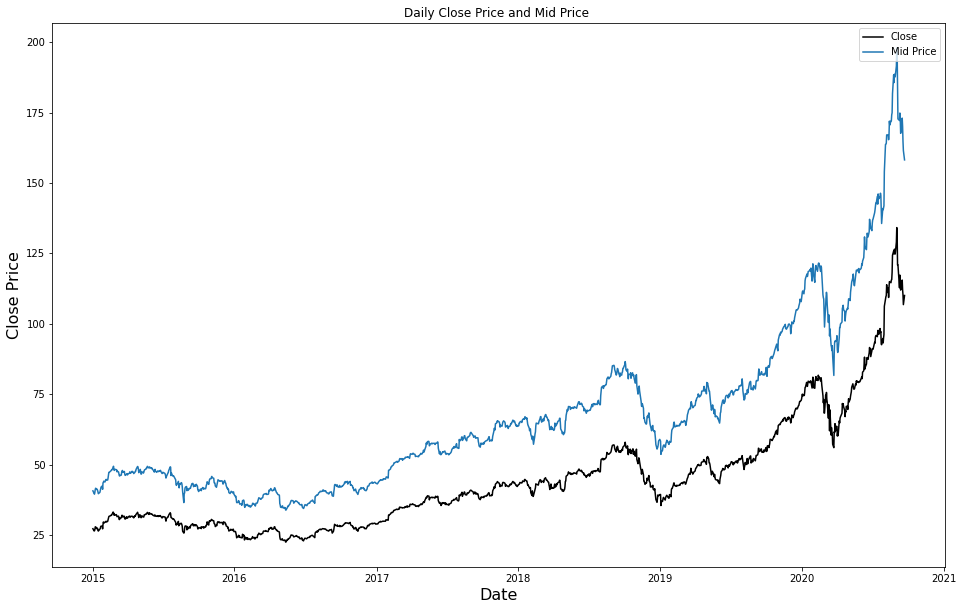

In [ ]:
mid_price = df['Low']+df['High']/2.0

#Visualize the closing price 
plt.figure(figsize=(16,10))
plt.title('Daily Close Price and Mid Price ')
plt.plot(df['Close'], color='black', label='close')
plt.plot(mid_price, label='Mid Price')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price', fontsize=16)
plt.legend(['Close', 'Mid Price'], loc=1)
plt.show()

In [ ]:
df_close = df["Close"]


last_month_close = df_close[-30:]

last_month_dataset = last_month_close.values
#print(last_month_close_values)


#create the future data 
future_data = []
for i in last_month_dataset:
  future_data.append(i)
  
k = 3
for j in range(len(last_month_dataset)-k):
  future_data[j] = last_month_dataset[j+k]

#for j in range(len(last_month_dataset)-k):
  #future_data[j] = (last_month_dataset[j+k] + last_month_dataset[j+k-1] + last_month_dataset[j+k-2])/3


future_data


[115.01000213623047,
 114.90750122070312,
 114.60749816894531,
 115.5625,
 115.7074966430664,
 118.2750015258789,
 124.37000274658203,
 125.85749816894531,
 124.82499694824219,
 126.52249908447266,
 125.01000213623047,
 124.80750274658203,
 129.0399932861328,
 134.17999267578125,
 131.39999389648438,
 120.87999725341797,
 120.95999908447266,
 112.81999969482422,
 117.31999969482422,
 113.48999786376953,
 112.0,
 115.36000061035156,
 115.54000091552734,
 112.12999725341797,
 110.33999633789062,
 106.83999633789062,
 110.08000183105469,
 110.33999633789062,
 106.83999633789062,
 110.08000183105469]

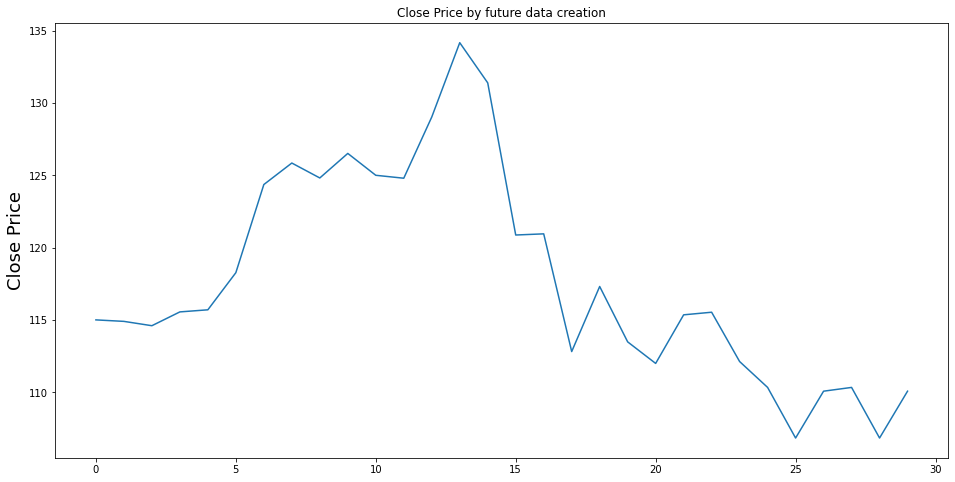

In [ ]:

plt.figure(figsize=(16,8))
plt.title('Close Price by future data creation')
plt.plot(future_data)

plt.ylabel('Close Price', fontsize=18)
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
%matplotlib inline

#x = all except the target 
#y = target 
x = df.drop(columns=['Close'])
y = df_close

#split the data to train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)


#create the svm model 
model = SVR(kernel='rbf', gamma='scale')
model.fit(x_train, y_train)


prediction = model.predict(x_test)

print(prediction.shape)
print(prediction)

score = model.score(x_test, y_test)
validation_score  = cross_val_score(model,x,y,cv=10)
print("svm score: ", score)
print('10-fold: \t\n',validation_score)

(432,)
[35.46186353 31.72792362 43.65142309 36.4955055  40.52488788 42.81101338
 42.55890114 45.57353739 42.70062247 40.35197498 42.78175141 43.49204064
 44.87280024 42.26521196 37.1165482  30.7387771  42.01102098 36.17015851
 45.4497784  33.34055231 41.56992511 42.16155997 44.88335025 44.33608713
 39.52978402 42.87933621 42.37367793 42.49101426 42.25135299 45.40624783
 41.0724772  42.86052222 44.36331628 39.98668499 44.03359966 43.20903134
 30.45058371 36.5543401  42.61159829 35.98893485 45.84752078 45.19989874
 38.96892411 43.2820181  44.60359996 34.99725251 31.15665974 35.52922797
 44.47412026 44.63279846 43.80154608 41.95695068 30.84628456 33.36585173
 34.98010572 44.32135767 33.06960663 33.80068478 41.61774296 34.14460034
 33.03549675 42.96634811 41.64811318 37.0632886  35.76565649 31.69028758
 45.00727337 32.05722392 44.41334831 36.95469074 42.79033564 32.99544862
 44.60972641 43.644322   31.30153798 30.66735431 34.41326899 36.3015997
 45.9187558  41.34768028 41.3618962  41.78736

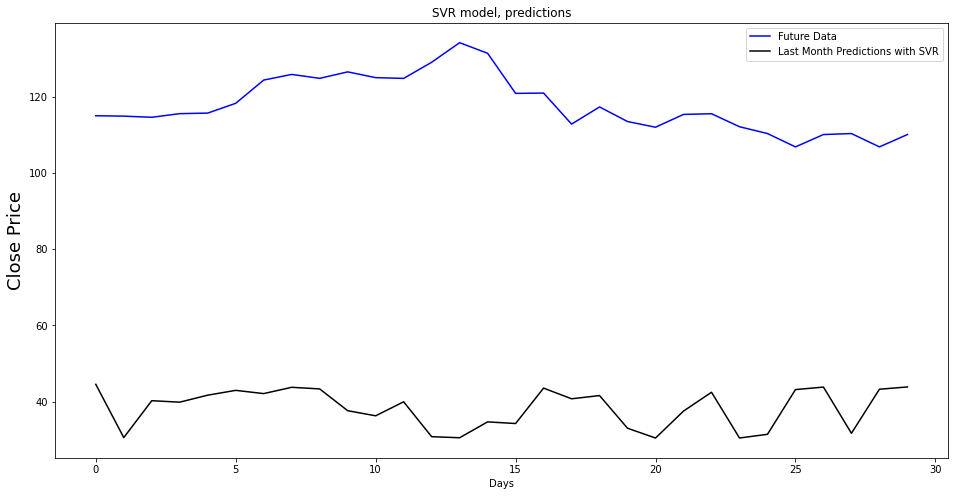

In [ ]:
plt.figure(figsize=(16,8))
plt.title('SVR model, predictions')
plt.plot(future_data, color='blue', label='Future Data')
plt.plot(prediction[-30:], color='black', label='Last Month Predictions')
plt.ylabel('Close Price', fontsize=18)
plt.xlabel('Days')
plt.legend(['Future Data', 'Last Month Predictions with SVR'], loc=1)
plt.show()

In [ ]:
future_avg = sum(future_data)/len(future_data)
last_month_close_avg = sum(prediction[-30:])/len(prediction[-30:])
close_avg = sum(df_close)/len(df_close)

print('future data avg:', future_avg)
print('last month close avg:', last_month_close_avg)
print('history close avg:', close_avg)

future data avg: 117.83674875895183
last month close avg: 38.34161818528607
history close avg: 44.599583288033806


0.9997567086354696


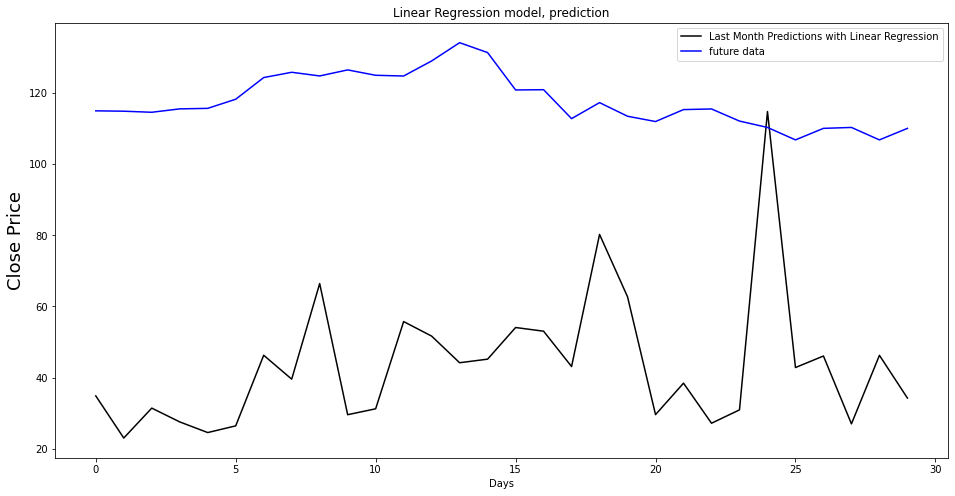

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
lr_score = lr.score(x_test, y_test)

print(lr_score)

plt.figure(figsize=(16,8))
plt.title('Linear Regression model, prediction')
plt.plot(lr_pred[-30:], color='black')
plt.plot(future_data, color='blue')
plt.xlabel('Days')
plt.ylabel('Close Price', fontsize=18)
plt.legend(['Last Month Predictions with Linear Regression', 'future data'],loc=1)
plt.show()

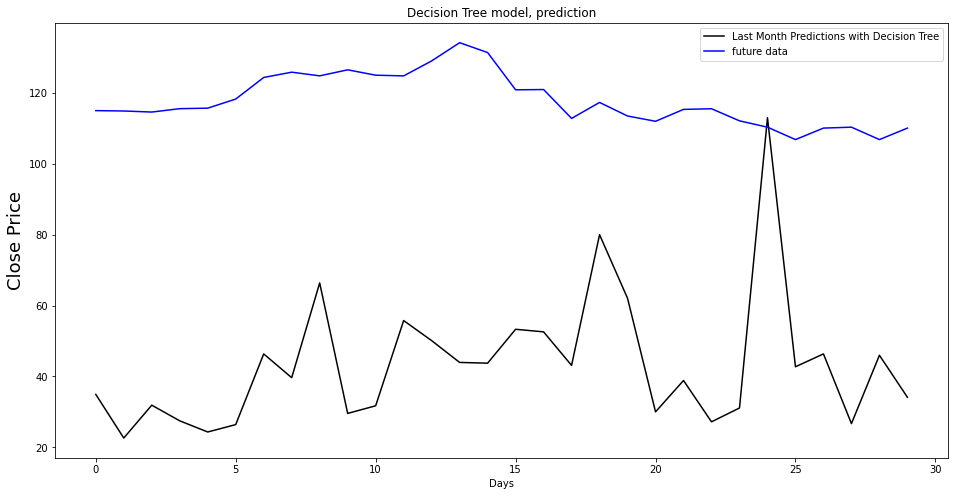

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train,y_train)
tree_pred = model.predict(x_test)


plt.figure(figsize=(16,8))
plt.title('Decision Tree model, prediction')
plt.plot(tree_pred[-30:], color='black')
plt.plot(future_data, color='blue')
plt.xlabel('Days')
plt.ylabel('Close Price', fontsize=18)
plt.legend(['Last Month Predictions with Decision Tree', 'future data'],loc=1)
plt.show()

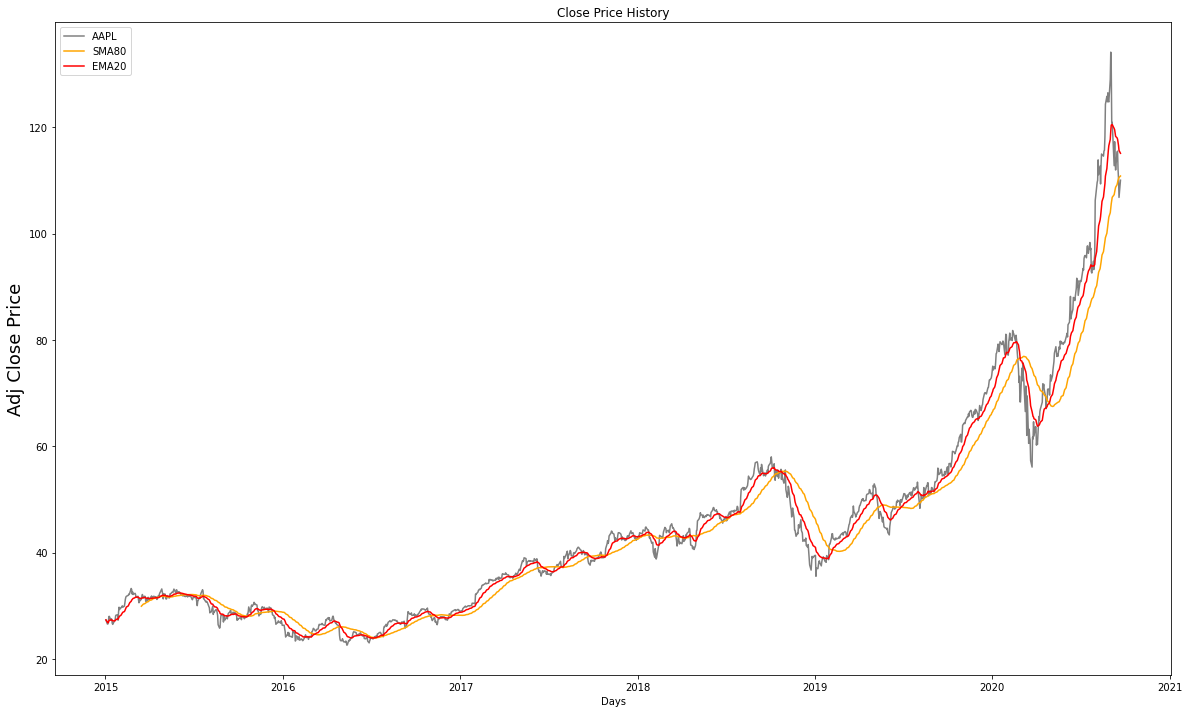

In [ ]:
#create a Simple Moving Average for 30 days
SMA20 = pd.DataFrame()
SMA20['Close'] = df['Close'].rolling(window=20).mean()

#create a Simple Moving Average for 90 days
SMA80 = pd.DataFrame()
SMA80['Close'] = df['Close'].rolling(window=50).mean()

EMA20 = pd.DataFrame()
EMA20['Close'] = df['Close'].ewm(span=20).mean()

EMA100 = pd.DataFrame()
EMA100['Close'] = df['Close'].ewm(span=100).mean()

plt.figure(figsize=(20,12))
plt.title('Close Price History')
plt.plot(df['Close'], color='grey', label=symbol.upper())
#plt.plot(SMA20['Close'], color='blue',label='SMA20')
plt.plot(SMA80['Close'], color='orange',label='SMA80')
plt.plot(EMA20['Close'], color='red',label='EMA20')
#plt.plot(EMA100['Close'], color='green',label='EMA100')
plt.xlabel('Days')
plt.ylabel('Adj Close Price', fontsize=18)
plt.legend(loc=2)
plt.show()

In [ ]:
data = pd.DataFrame()
data['Close'] = df['Close']
data['Change(%)'] = df['Close'].pct_change()
data['EMA20'] = EMA20['Close']
data['SMA80'] = SMA80['Close']
data['Close']

Date
2015-01-02     27.332500
2015-01-05     26.562500
2015-01-06     26.565001
2015-01-07     26.937500
2015-01-08     27.972500
                 ...    
2020-09-15    115.540001
2020-09-16    112.129997
2020-09-17    110.339996
2020-09-18    106.839996
2020-09-21    110.080002
Name: Close, Length: 1440, dtype: float64

In [ ]:
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell= []
  flag = -1

  for i in range(len(data)):
    if EMA20['Close'][i] > SMA80['Close'][i]:
      if flag != 1:
        sigPriceBuy.append(data['Close'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
         sigPriceBuy.append(np.nan)
         sigPriceSell.append(np.nan) 
    elif EMA20['Close'][i] < SMA80['Close'][i]:
         if flag != 0:
           sigPriceBuy.append(np.nan)
           sigPriceSell.append(data['Close'][i])
           flag = 0
         else:
           sigPriceBuy.append(np.nan)
           sigPriceSell.append(np.nan)  
    else:          
       sigPriceBuy.append(np.nan)
       sigPriceSell.append(np.nan)

  return (sigPriceBuy, sigPriceSell)

In [ ]:
data=pd.DataFrame()
signal = buy_sell(df)
df['Buy_Signal_Price'] = signal[0]
df['Sell_Signal_Price'] = signal[1]



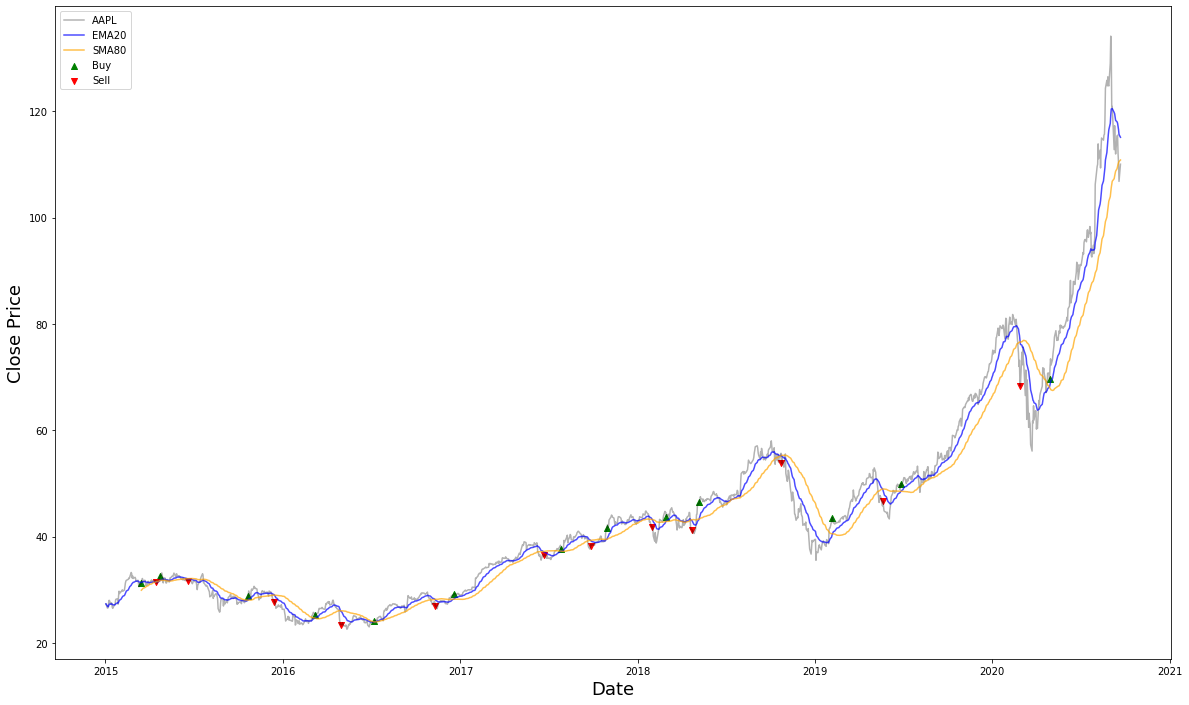

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(df['Close'], color='black', label=symbol.upper(), alpha=0.3)
plt.plot(EMA20['Close'], color='blue',label='EMA20',alpha=0.7)
plt.plot(SMA80['Close'], color='orange',label='SMA80',alpha=0.7)
plt.scatter(df.index, df['Buy_Signal_Price'], label='Buy', marker = '^', color='green')
plt.scatter(df.index, df['Sell_Signal_Price'], label='Sell', marker = 'v', color='red')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend(loc=2)
plt.show()